<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<img src="https://lh3.googleusercontent.com/proxy/cSLk1ChQGIw3uNJlU7VF59LE_K96IrIirIoS9I-G3ZdNPW5Z-F7CohJvyI2YYQksMgFCykIAtTPPFPCrzFqC5ZnVPf-PDrblSvONUoL1WPz0yZzwbpCPBpiZAGYxDG6zO_nf" width="120" height="120" align="right">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Task 1</i></font></h1>

Import necessary libs

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# sklearn stuff
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Explain Data

Affinity
Spending data from <a src='https://www.affinity.solutions/'> affinity solutions </a>.

* spend_all: Seasonally adjusted credit/debit card spending in all merchant category codes (MCC)

* spend_acf: Seasonally adjusted credit/debit card spending in accomodation and food service (ACF)

* spend_aer: Seasonally adjusted credit/debit card spending in arts, entertainment, and recreation (AER)

* spend_apg: Seasonally adjusted credit/debit card spending in general merchandise stores (GEN)

* spend_grf: Seasonally adjusted credit/debit card spending in grocery and food store (GRF)

* spend_hcs: Seasonally adjusted credit/debit card spending in health care and social assistance (HCS)

* spend_tws: Seasonally adjusted credit/debit card spending in transportation and warehousing (TWS)

## Load Data

In [2]:
PATH_TO_DATA = 'Affinity-City-Daily-final.csv'
Data = pd.read_csv(PATH_TO_DATA)

"spend_all" is the sum of all expenses and income. For this reason, this feature has a high correlation with other features. Other features can be calculated through it. The presence of this feature affects the predictive performance of another column and makes the forecasting process insignificant. So we delete this feature.

In [3]:
Data = Data.drop(['spend_all'], axis=1)

The correlation of each feature pair is given below. To get a sense of the impact of features on a feature.

In [4]:
Data.corr()

,year,month,day,cityid,spend_acf,spend_aer,spend_grf,spend_hcs,spend_tws
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000e+00,-1.657978e-01,1.957970e-17,-0.351324,-0.546759,0.065230,-0.013919,-0.528587
day,NaN,-1.657978e-01,1.000000e+00,1.214741e-17,-0.019438,-0.010605,-0.012986,-0.052290,-0.015943
cityid,NaN,1.957970e-17,1.214741e-17,1.000000e+00,0.006232,0.022850,-0.051479,0.013522,0.012099
spend_acf,NaN,-3.513240e-01,-1.943797e-02,6.232209e-03,1.000000,0.826581,-0.204533,0.755661,0.918112
spend_aer,NaN,-5.467595e-01,-1.060523e-02,2.284981e-02,0.826581,1.000000,-0.215961,0.603598,0.870423
spend_grf,NaN,6.523021e-02,-1.298626e-02,-5.147877e-02,-0.204533,-0.215961,1.000000,-0.148552,-0.211140
spend_hcs,NaN,-1.391905e-02,-5.229010e-02,1.352168e-02,0.755661,0.603598,-0.148552,1.000000,0.668686
spend_tws,NaN,-5.285867e-01,-1.594320e-02,1.209942e-02,0.918112,0.870423,-0.211140,0.668686,1.000000


In [5]:
Data

,year,month,day,cityid,spend_acf,spend_aer,spend_grf,spend_hcs,spend_tws
0,2020,1,13,1,-0.00322,0.00706,0.00389,-0.03550,-0.00510
1,2020,1,13,2,0.00660,-0.07790,-0.00956,0.06040,-0.03250
2,2020,1,13,3,-0.10400,0.03340,0.01240,-0.00547,0.01810
3,2020,1,13,4,-0.03560,-0.15000,0.00405,0.03050,-0.01790
4,2020,1,13,5,-0.00770,-0.04040,0.00888,-0.00653,0.00175
...,...,...,...,...,...,...,...,...,...
12245,2020,9,13,49,-0.32600,-0.42000,-0.09140,-0.03690,-0.57100
12246,2020,9,13,50,-0.19800,-0.68700,0.37900,-0.35200,-0.55500
12247,2020,9,13,51,-0.00545,-0.29800,0.21200,0.61400,-0.32400
12248,2020,9,13,52,-0.42000,-0.73100,0.16200,-0.35200,-0.56800


The target attribute and the desired attributes for prediction of target are set out below. target is "spend_tws"

In [6]:
target = 'spend_tws'
col_list = list(Data.columns)
drop_col = ['year','month','day','cityid',target]

for i in drop_col:
  col_list.remove(i)

col_list

['spend_acf', 'spend_aer', 'spend_grf', 'spend_hcs']

In [7]:
X = Data[col_list]
y = Data[target]

In [8]:
X

,spend_acf,spend_aer,spend_grf,spend_hcs
0,-0.00322,0.00706,0.00389,-0.03550
1,0.00660,-0.07790,-0.00956,0.06040
2,-0.10400,0.03340,0.01240,-0.00547
3,-0.03560,-0.15000,0.00405,0.03050
4,-0.00770,-0.04040,0.00888,-0.00653
...,...,...,...,...
12245,-0.32600,-0.42000,-0.09140,-0.03690
12246,-0.19800,-0.68700,0.37900,-0.35200
12247,-0.00545,-0.29800,0.21200,0.61400
12248,-0.42000,-0.73100,0.16200,-0.35200


In [9]:
y

0       -0.00510
1       -0.03250
2        0.01810
3       -0.01790
4        0.00175
          ...   
12245   -0.57100
12246   -0.55500
12247   -0.32400
12248   -0.56800
12249   -0.39000
Name: spend_tws, Length: 12250, dtype: float64

## Split Data to train and test

In [10]:
def split(X, y, train_size=0.5):
    mid = int(len(y)*train_size)
    X_train = X[:mid]
    X_test  = X[mid:]
    y_train = y[:mid]
    y_test  = y[mid:]
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = split(X, y)

In [12]:
X_train.shape , X_test.shape

((6125, 4), (6125, 4))

In [13]:
y_train.shape, y_test.shape

((6125,), (6125,))

## Train Regression Models

In [14]:
def vis(y, y_pred):
    temp = [i for i in range(len(y))]
    plt.plot(temp, y_pred, color = 'blue', label='$Estimated Value$')
    plt.plot(temp, y, color= 'green', label='$True Value$')
    plt.grid()
    plt.legend()
    plt.title('Measured and estimated values')
    plt.xlabel('Time')
    plt.ylabel('Value')

using linear regression to predict target

In [15]:
p_reg= Pipeline([
        ("std_scaler", StandardScaler()),
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

calculate mse to evaluate model in train and test

In [16]:
p_reg.fit(X_train, y_train)
y_train_pred = p_reg.predict(X_train)
mean_squared_error(y_train, y_train_pred)

0.006645750099123938

In [17]:
y_test_pred = p_reg.predict(X_test)
mean_squared_error(y_test, y_test_pred)

0.012887329819480323

visualize model prediction and actual values for train and test data. values ​​are displayed as time goes on.

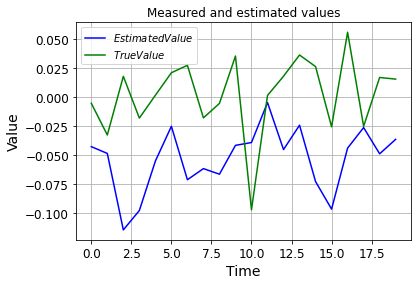

In [18]:
vis(y_train[0:20], y_train_pred[0:20]) 

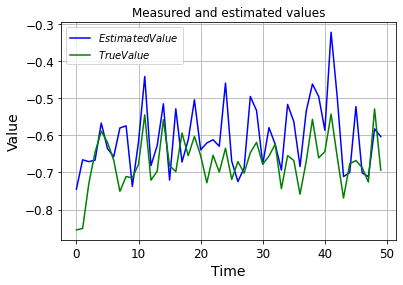

In [19]:
vis(y_test[200:250], y_test_pred[200:250]) 

## Find the appropriate poly degree

mse of linear regression on test is high. for this reason, the data pattern seems to have a higher degree than line polynomials. we fit 1 to 5 degree polynomials to the data to get the optimal degree of fit.

In [20]:
test_mses = []
train_mses = []
degrees = [i for i in range(1, 6)]
for d in degrees:
    p_reg= Pipeline([
            ("std_scaler", StandardScaler()),
            ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
    p_reg.fit(X_train, y_train)
    y_train_pred = p_reg.predict(X_train)
    train_mses.append(mean_squared_error(y_train, y_train_pred))
    y_test_pred = p_reg.predict(X_test)
    test_mses.append(mean_squared_error(y_test, y_test_pred))

Text(0.5, 0, 'degree')

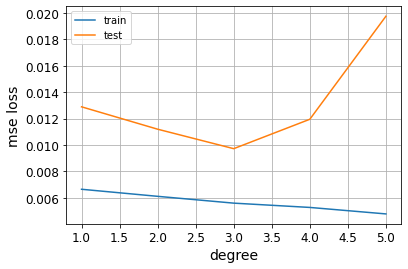

In [21]:
plt.plot(degrees, train_mses, label='train')
plt.plot(degrees, test_mses, label='test')
plt.grid()
plt.legend()
plt.ylabel('mse loss')
plt.xlabel('degree')

## use the best model

Based on mse test data for different degrees, degree 3 is optimal. For degree 3, we obtain mse of test and training data. We draw the model prediction for the test and training data as before. Examining the graphs helps to understand the quality of the model in the forecast.

In [22]:
p_reg= Pipeline([
            ("std_scaler", StandardScaler()),
            ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
p_reg.fit(X_train, y_train)
y_train_pred = p_reg.predict(X_train)
y_test_pred = p_reg.predict(X_test)
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(0.005595414421579764, 0.009718986150753927)

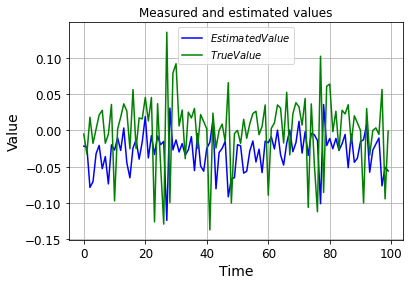

In [23]:
vis(y_train[0:100], y_train_pred[0:100]) 

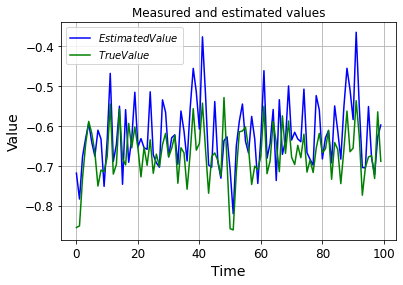

In [24]:
vis(y_test[200:300], y_test_pred[200:300]) 

For optimal degree, mse is low and desirable for testing. This can also be seen in the near-true prediction in test data.